In [41]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 12,8 #adjust the configuration of the plots are will create


# Read in the data
df = pd.read_csv(r'C:\Users\SURYA EKO PRASETYO\Downloads\movies.csv')

In [3]:
# Lets Look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [42]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [43]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [44]:
df.dropna(inplace=True)

In [45]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [60]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime month_day           year_region  \
0   46998772        Warner Bros.    146.0   June 13  1980 (United States)   
1   58853106   Columbia Pictures    104.0    July 2  1980 (United States)   
2  538375067           Lucasfilm    124.0   June 20  1980 (United States)   
3   83453539  Paramount Pictures     88.0    July 2  1980 (United States)   
4   39846344      Orion Pictures     98.0   July 25  1980 (United States)   

  year_correct  
0         1980  
1         1980  
2         1980  
3         1980  
4         1980

In [47]:
df[['month_day', 'year_region']] = df['released'].str.split(', ', n=1, expand=True)

In [48]:
df['year_correct'] = df['year_region'].astype(str).str[:4]

In [49]:
df1 = df.drop(columns=['month_day', 'year_region'])

In [61]:
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year_correct  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [53]:
df1 = df1.sort_values(by=['gross'], inplace=False, ascending=False)

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# drop any duplicates

df1.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [16]:
# Budget high correlation
# Company High correlation


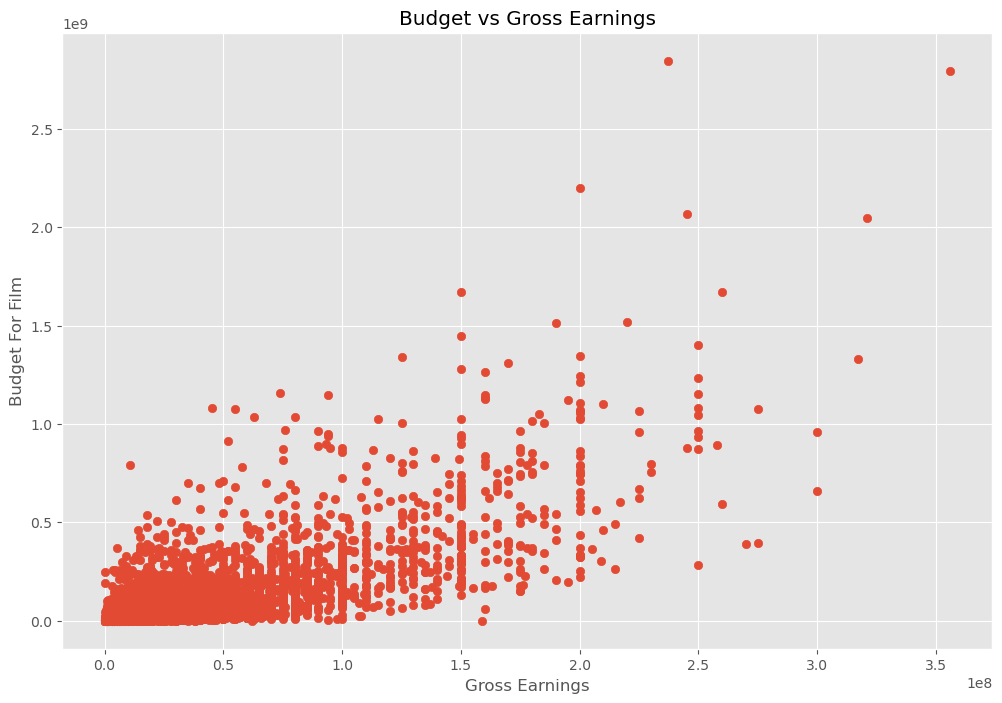

In [17]:
# Scatter Plot with budget vs gross

plt.scatter(x=df1['budget'],
           y=df1['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

plt.show()

In [18]:
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year_correct  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

<Axes: xlabel='budget', ylabel='gross'>

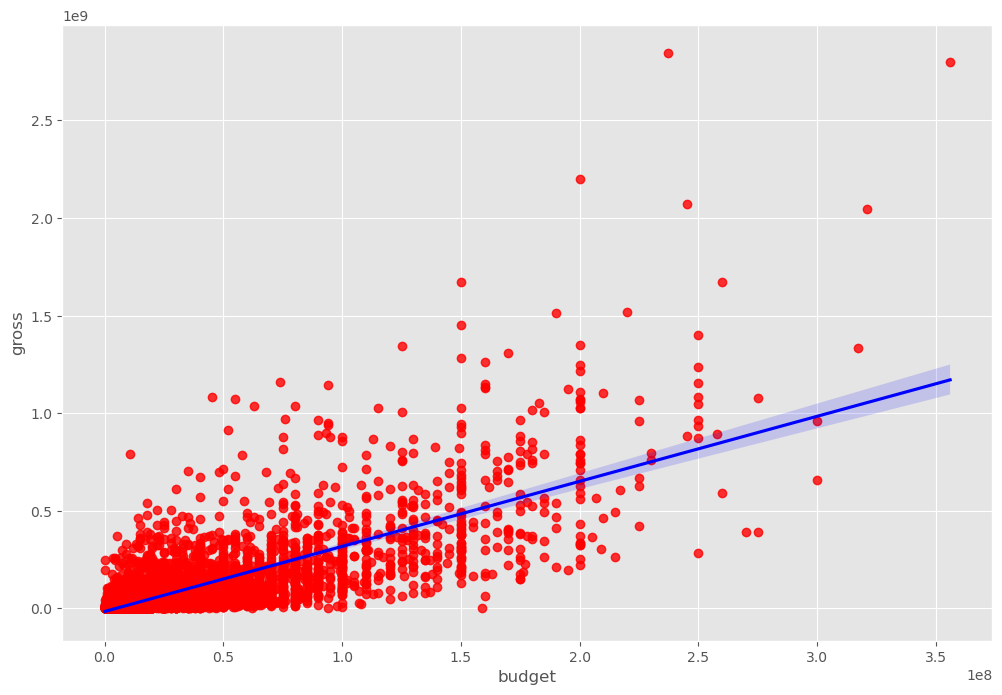

In [19]:
# Plot Budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df1, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

In [62]:
# let's start looking at coreelation
dfCorr = df1[['budget','gross','runtime','score','votes','year']]
dfCorr.head()

budget       gross  runtime  score      votes  year
5445  237000000  2847246203    162.0    7.8  1100000.0  2009
7445  356000000  2797501328    181.0    8.4   903000.0  2019
3045  200000000  2201647264    194.0    7.8  1100000.0  1997
6663  245000000  2069521700    138.0    7.8   876000.0  2015
7244  321000000  2048359754    149.0    8.4   897000.0  2018

In [33]:
dfCorr.corr(method='pearson') #pearson, kendall, spearman

budget     gross   runtime     score     votes      year
budget   1.000000  0.740247  0.318695  0.072001  0.439675  0.327722
gross    0.740247  1.000000  0.275796  0.222556  0.614751  0.274321
runtime  0.318695  0.275796  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.222556  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.614751  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.274321  0.075077  0.056386  0.206021  1.000000

In [ ]:
# High Correlation Between budget and gross
# i was right

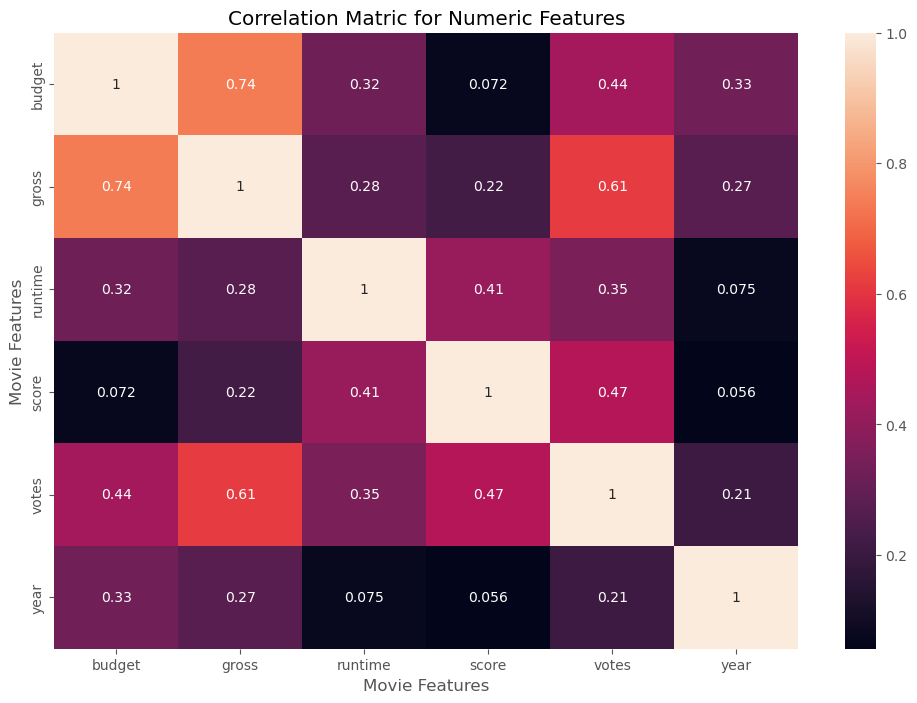

In [37]:
correlation_matrix = dfCorr.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [38]:
# Looks at company
df1.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year_correct  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [63]:
df_numerized = df1

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  year_correct  
5445  1534       47  237000000  2847246203     1382    162.0            29  
7445  1470       47  356000000  2797501328      983    181.0            39  
3045  1073       47  200000000  2201647264     1382    194.0            17  
6663   356       47  245000000  2069521700      945    138.0            35  
7244  1470       47  321000000  2048359754      983    149.0            38

In [64]:
df1.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  year_correct  
5445  1534       47  237000000  2847246203     1382    162.0            29  
7445  1470       47  356000000  2797501328      983    181.0            39  
3045  1073       47  200000000  2201647264     1382    194.0            17  
6663   356       47  245000000  2069521700      945    138.0            35  
7244  1470       47  321000000  2048359754      983    149.0            38

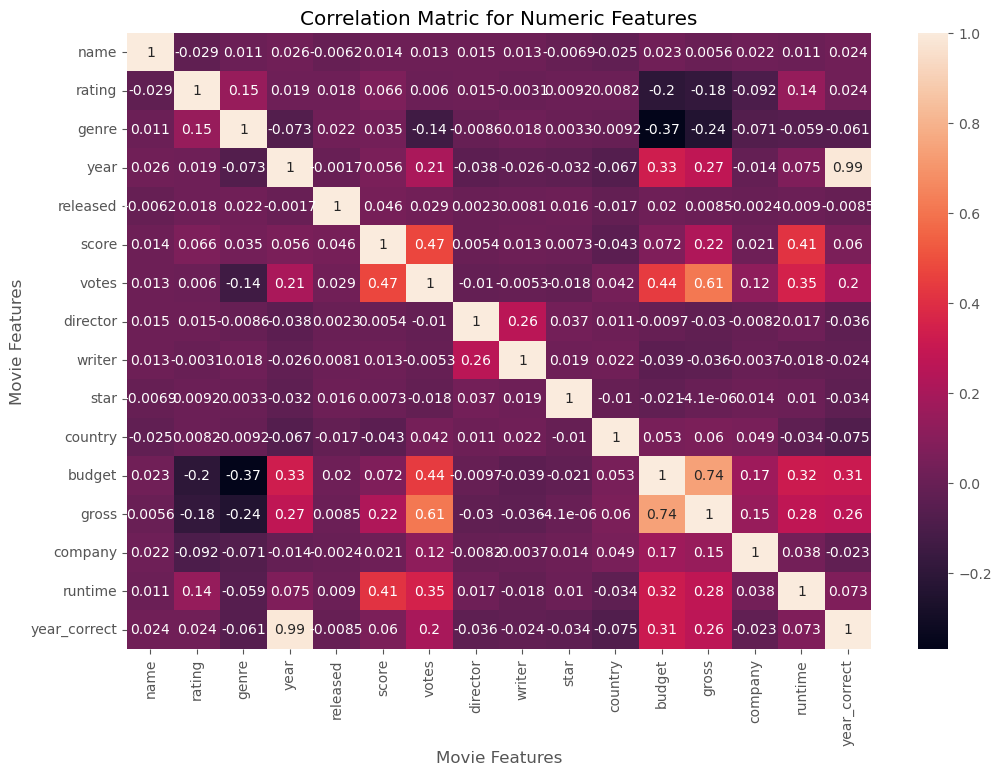

In [55]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [56]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating       -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre         0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year          0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released     -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score         0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes         0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director      0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer        0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star         -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country      -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget        0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross         0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company       0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime       0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
year_correct  0.024136  0.023929 -0.061186  0.987770 -0.008497  0.059718   

                 votes  director    writer      star   country    budget  \
name          0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating        0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre        -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year          0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released      0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score         0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes         1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director     -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer       -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star         -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country       0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget        0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross         0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company       0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime       0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
year_correct  0.198517 -0.036329 -0.024179 -0.034355 -0.074546  0.314628   

                 gross   company   runtime  year_correct  
name          0.005639  0.021697  0.010850      0.024136  
rating       -0.181906 -0.092357  0.140792      0.023929  
genre        -0.244101 -0.071334 -0.059237     -0.061186  
year          0.274321 -0.014333  0.075077      0.987770  
released      0.008501 -0.002407  0.008975     -0.008497  
score         0.222556  0.020656  0.414068      0.059718  
votes         0.614751  0.118470  0.352303      0.198517  
director     -0.029560 -0.008223  0.017433     -0.036329  
writer       -0.035885 -0.003697 -0.017561     -0.024179  
star         -0.000004  0.014082  0.010108     -0.034355  
country       0.060078  0.048569 -0.034477     -0.074546  
budget        0.740247  0.170235  0.318695      0.314628  
gross         1.000000  0.149553  0.275796      0.264334  
company       0.149553  1.000000  0.037585     -0.022510  
runtime       0.275796  0.037585  1.000000      0.073115  
year_correct  0.264334 -0.022510  0.073115      1.000000

In [57]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.024136
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
country       year_correct   -0.074546
year_correct  country        -0.074546
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
year          country        -0.066748
country       year           -0.066748
genre         year_correct   -0.061186
year_correct  genre          -0.061186
genre         runtime        -0.059237
runtime       genre          -0.059237
score         country        -0.043051
country       score      

In [59]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_correct  year            0.987770
year          year_correct    0.987770
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation
# i was wrong